<strong><h2>Andrew Ng- Machine Learning Course (Coursera)</h2></strong>
<br/>
<strong><h2>Programming Assignment 1 (Linear Regression)</h2></strong><br/>
<p align="justify">This is a implementation of the Linear Regression programming assignment in PYTHON.
The below code is the conversion of Octave exercise program into python. This is just the part of the assignment. You can find the replica of this code in Ocatve inside the assigment folder exercise 1 (i.e. ex1.m file).</p>

<h2>Dependencies</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

<h2>Dataset</h2><br/>
Converted the .txt file of the assignment into the .csv file and add the header as Population, Profit.

From file 'ex1data1.csv' has been chosen the variables:
 - **Population** : Population of City in 10,000s
 - **Profit** : Profit in $10,000
 
Read the file, save data as matrix. Assign x to 1st column(population) and y to 2nd column(profit) 

In [2]:
dataset = pd.read_csv('ex1data1.csv')
data = dataset.as_matrix()
x = data[:, 0]
y = data[:, 1]
m = data.shape[0]
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


======================= <strong>Part 2: Plotting</strong> =======================

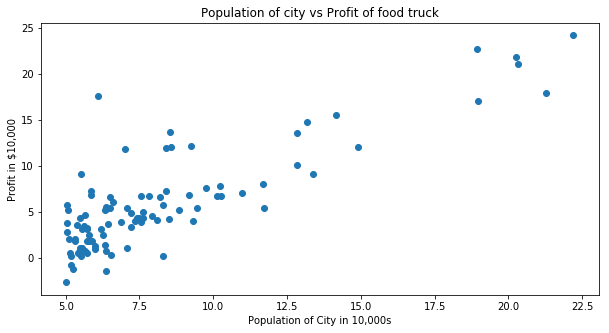

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title('Population of city vs Profit of food truck')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

=================== <strong>Part 3: Cost and Gradient descent </strong> ===================

In [4]:
x0 = np.ones((m,1)) # initialize the x0 variables with ones
x = np.reshape(x, (m,1)) # convert the dataset x into m*1 matrix
Y = np.reshape(y, (m,1)) # convert the dataset y into m*1 matrix
X = np.concatenate((x0, x), axis=1) # add a column of ones to x

theta = np.zeros((2,1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500 # no of iterations
alpha = 0.01 # learning rate

#define costCompute function
def computeCost(x, y, theta):
    m = len(y)
    j = 0
    j = (np.sum((x.dot(theta) - y )**2)) / (2*m)
    return j

#compute and display initial cost
j = computeCost(X, Y, theta) 
# compute cost at theta[0;0]
print('With theta = [0 ; 0] \nCost computed = {}'.format(j));

With theta = [0 ; 0] 
Cost computed = 32.072733877455676


In [5]:
test_theta = np.array([[-1], [2]]) 
# compute cost at theta[-1,2]
J = computeCost(X,Y, test_theta)
print('With theta = [-1 ; 2] \nCost computed = {}'.format(J));

With theta = [-1 ; 2] 
Cost computed = 54.24245508201238


In [6]:
#define gradient descent
def gradientDescent(x, y, theta, alpha, num_iter):
    m = len(y)
    j_history = np.zeros((num_iter, 1))
    for i in range(num_iter):
        theta = theta - ((((X.dot(theta)-Y).T).dot(X).T) * alpha  / m)
        j_history[i] = computeCost(x, y, theta)
    
    return j_history, theta

#run gradient descent
new_theta = gradientDescent(X, Y, theta, alpha, iterations) #compute new theta
theta = new_theta[1]
print('Theta found by gradient descent:')
print("{:f}, {:f}".format(theta[0,0], theta[1,0]))

Theta found by gradient descent:
-3.630291, 1.166362


<strong><h4>Plot the linear fit</h4></strong>

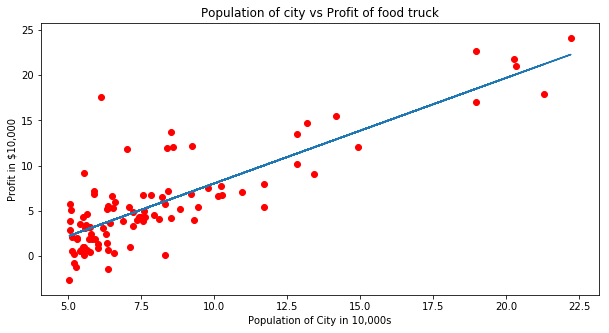

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data[:, 0], X.dot(theta))
plt.scatter(data[:,0], data[:,1],color='red')
plt.title('Population of city vs Profit of food truck')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

<strong>Predict values for population sizes of 35,000 and 70,000</strong>

In [8]:
sample1 = np.reshape([1,3.5],(1,2)) 
predict1 = sample1.dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))

For population = 35,000, we predict a profit of 4519.767868


In [9]:
sample2 = np.reshape([1, 7],(1,2))
predict2 = sample2.dot(theta)
print("For population = 70,000, we predict a profit of {:f}".format( float(predict2*10000) ))

For population = 70,000, we predict a profit of 45342.450129


============= <strong>Part 4: Visualizing J(theta_0, theta_1)</strong> =============

In [10]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

j_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        j_vals[i,j] = computeCost(X, Y, t)

j_vals = np.transpose(j_vals)


<h3><strong>Surface Plot</strong></h3>

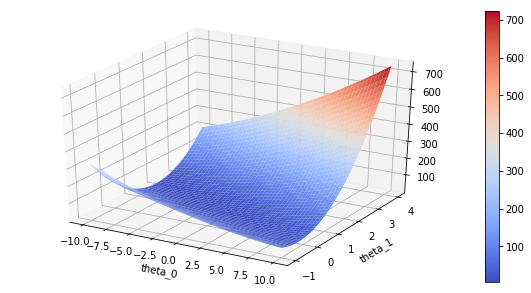

In [11]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
surface = ax.plot_surface(theta0_vals, theta1_vals, j_vals, cmap=cm.coolwarm, rstride=2, cstride=2)
fig.colorbar(surface)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show(block=False)

<h3><strong>Contour Plot </strong></h3>

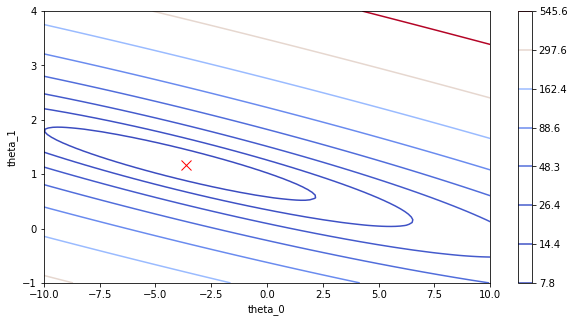

In [12]:
fig = plt.figure(figsize=(10,5))
ex = fig.add_subplot(111)
# Plot J_vals as 20 contours spaced logarithmically between 0.01 and 100
contour_set = plt.contour(theta0_vals, theta1_vals, j_vals, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.colorbar(contour_set)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show(block='false')